# S09 T01: Tasca Feature Engineering

In [147]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats
import statistics

%matplotlib inline
pd.set_option('display.max_columns', None)

In [148]:
pip freeze 

absl-py @ file:///C:/ci/absl-py_1623867339542/work
aiohttp @ file:///C:/ci/aiohttp_1632750093640/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342752200/work
anaconda-navigator==2.1.0
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
anyio @ file:///C:/ci/anyio_1620153418380/work/distNote: you may need to restart the kernel to use updated packages.

appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
arrow==0.13.1
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astor==0.8.1
astroid @ file:///C:/ci/astroid_1628063293445/work
astropy @ file:///C:/ci/astropy_1629829351783/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_16159

## Exercise 1

Get a sports-themed dataset that you like and normalize categorical attributes in dummy. Standardize numeric attributes with StandardScaler.

In [220]:
# Baseball database of 1986, by player
df = pd.read_csv('Hitters.csv')

### Exploring database

In [150]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


AtBat: Number of times at bat in 1986

Hits: Number of hits in 1986

HmRun: Number of home runs in 1986

Runs: Number of runs in 1986

RBI: Number of runs batted in in 1986

Walks: Number of walks in 1986

Years: Number of years in the major leagues

CAtBat: Number of times at bat during his career

CHits: Number of hits during his career

CHmRun: Number of home runs during his career

CRuns: Number of runs during his career

CRBI: Number of runs batted in during his career

CWalks: Number of walks during his career

League: A factor with levels A and N indicating player's league at the end of 1986

Division: A factor with levels E and W indicating player's division at the end of 1986

PutOuts: Number of put outs in 1986

Assists: Number of assists in 1986

Errors: Number of errors in 1986

Salary: 1987 annual salary on opening day in thousands of dollars

NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [152]:
# Looking for duplicated data
df.duplicated().sum()

0

In [153]:
# Looking for Null
null= df.isnull().sum()
null

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [154]:
# Filling missing salaries with the median
sal_median= df['Salary'].median()

In [155]:
df['Salary'] = df['Salary'].fillna(sal_median)

In [156]:
# Checking again, nulls removed
null= df.isnull().sum()
null

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [157]:
# Getting statistics of numerical data

df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,515.600953
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,409.817459
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


Text(0.5, 1.0, 'Salary histogram')

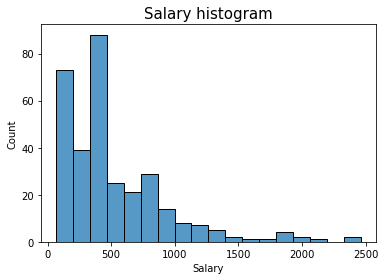

In [158]:
# Salary will be our target feature

sns.histplot(data=df['Salary'])
plt.title('Salary histogram',fontsize=15)

Salary has not a normal distribution since it's skewed to the right (positive skewness).

In [159]:
# Binifying salaries with bins of 500 thousand dollars to ease analysis
bins = np.arange(0,df['Salary'].max() + 500, 500).astype(int)
df['sal_bins'] = pd.cut(df['Salary'], bins)

In [160]:
df['sal_bins'].value_counts()

(0, 500]        210
(500, 1000]      82
(1000, 1500]     19
(1500, 2000]      8
(2000, 2500]      3
Name: sal_bins, dtype: int64

In [161]:
# Target feature
targ_column = ['sal_bins']
print(f'The target column is: {targ_column}')

# Numeric features
num_columns = list(df.select_dtypes('number').columns)
print(f"Numerical columns are: {num_columns}")

# Categorical features 
cat_columns = list(set(df.columns) - set(num_columns) - set(targ_column))
print(f"Categorical columns are: {cat_columns}")

The target column is: ['sal_bins']
Numerical columns are: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']
Categorical columns are: ['NewLeague', 'Division', 'League']


In [162]:
# Crating a variable with numerical columns

var=['AtBat','Hits','HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']


In [163]:
# Creating dummy variables with categorical variables
dummy=pd.get_dummies(df[['League','NewLeague','Division']])
dummy.head()

,League_A,League_N,NewLeague_A,NewLeague_N,Division_E,Division_W
0,1,0,1,0,1,0
1,0,1,0,1,0,1
2,1,0,1,0,0,1
3,0,1,0,1,1,0
4,0,1,0,1,1,0


In [164]:
# Concatenating dataframe with the new dummy variables.

df=pd.concat([df,dummy], axis=1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,sal_bins,League_A,League_N,NewLeague_A,NewLeague_N,Division_E,Division_W
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,425.0,A,"(0, 500]",1,0,1,0,1,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N,"(0, 500]",0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A,"(0, 500]",1,0,1,0,0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N,"(0, 500]",0,1,0,1,1,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N,"(0, 500]",0,1,0,1,1,0


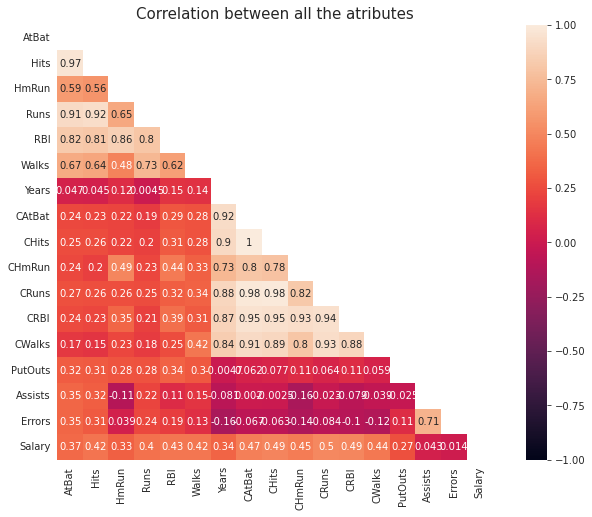

In [165]:
# Creating a correlation heatmap with the numercial variables
corr = df.loc[:,var].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, square=True)
    
plt.title('Correlation between all the atributes',fontsize=15)
plt.show()

The correlation of salary with the individual variables is positive but not strong. The highest correlation is with CRBI (Number of runs batted in during his career, 0.57), CRuns (Number of runs during his career, 0.56) or CHits (Number of hits during his career, 0.55). It means that Salary depends on multiple factors, some of them may not be registered in the database, as popularity, for example.

In [166]:
# Using StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms

from sklearn.preprocessing import StandardScaler

In [167]:
features = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors' ]

In [168]:
# Separating out the features
x = df.loc[:, features].values
x

array([[ 293,   66,    1, ...,  446,   33,   20],
       [ 315,   81,    7, ...,  632,   43,   10],
       [ 479,  130,   18, ...,  880,   82,   14],
       ...,
       [ 475,  126,    3, ...,   37,  113,    7],
       [ 573,  144,    9, ..., 1314,  131,   12],
       [ 631,  170,    9, ...,  408,    4,    3]], dtype=int64)

In [169]:
y= df.loc[:,'sal_bins'].values
y

[(0, 500], (0, 500], (0, 500], (0, 500], (0, 500], ..., (500, 1000], (500, 1000], (0, 500], (500, 1000], (500, 1000]]
Length: 322
Categories (5, interval[int64, right]): [(0, 500] < (500, 1000] < (1000, 1500] < (1500, 2000] < (2000, 2500]]

In [170]:
# Standardizing the features
x= StandardScaler().fit_transform(x)

In [171]:
x

array([[-0.57407148, -0.75512977, -1.12359063, ...,  0.56039893,
        -0.54092397,  1.88089921],
       [-0.43043703, -0.43173229, -0.43357884, ...,  1.2240485 ,
        -0.46774014,  0.308192  ],
       [ 0.64029256,  0.62469948,  0.83144278, ...,  2.10891458,
        -0.1823232 ,  0.93727488],
       ...,
       [ 0.61417721,  0.53846015, -0.8935867 , ..., -0.8989165 ,
         0.04454668, -0.16362016],
       [ 1.25400343,  0.92653713, -0.20357491, ...,  3.65743023,
         0.17627758,  0.62273344],
       [ 1.63267609,  1.48709276, -0.20357491, ...,  0.42481462,
        -0.75315708, -0.79270304]])

## Exercise 2

Analyse main components

In [172]:
from sklearn.decomposition import PCA

In [173]:
# Using Principal Component Analysis (PCA) to visualise data
pca = PCA(n_components=2)

In [174]:
principalComponents = pca.fit_transform(x)

In [175]:
principalComponents

array([[-3.24010642, -0.253173  ],
       [ 0.24548795,  1.30295065],
       [ 0.60388338, -2.61700162],
       [ 3.59127568,  0.54782109],
       [-2.26452833, -0.69889824],
       [ 1.22953505, -1.82509334],
       [-3.80289288,  1.09515134],
       [-3.29919038,  0.31339912],
       [-3.04612041, -0.56334462],
       [ 3.77946437,  1.96715337],
       [ 3.3047477 , -2.5215784 ],
       [-1.88139468,  1.25028727],
       [-0.66712957, -0.85114987],
       [-2.23490924,  1.48541764],
       [-0.86272012,  2.1711554 ],
       [-3.7787889 ,  1.55552832],
       [ 5.87364477, -0.02377671],
       [-3.43575433,  0.87582283],
       [ 2.58135516,  0.71218663],
       [-3.00482857,  1.88973538],
       [-1.44509002, -1.75176572],
       [-1.9136365 , -1.22389804],
       [-4.17331657,  1.9333713 ],
       [ 0.40657522, -1.37601893],
       [ 5.96267399, -0.42402729],
       [ 0.86725025, -1.67665858],
       [-1.83882929,  1.25242309],
       [ 0.24749519, -0.98991533],
       [ 0.56882078,

Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In [197]:
# Creating a new dataframe with the results
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal component 1', 'Principal component 2'])

In [198]:
principalDf

,Principal component 1,Principal component 2
0,-3.240106,-0.253173
1,0.245488,1.302951
2,0.603883,-2.617002
3,3.591276,0.547821
4,-2.264528,-0.698898
...,...,...
317,-0.089503,-0.521050
318,3.339811,-0.732713
319,-0.951442,-0.910086
320,2.091473,-2.265826


In [199]:
# Concatenating principals components with Salary bins.

finalDf = pd.concat([principalDf, df[['sal_bins']]], axis = 1)

In [200]:
finalDf

,Principal component 1,Principal component 2,sal_bins
0,-3.240106,-0.253173,"(0, 500]"
1,0.245488,1.302951,"(0, 500]"
2,0.603883,-2.617002,"(0, 500]"
3,3.591276,0.547821,"(0, 500]"
4,-2.264528,-0.698898,"(0, 500]"
...,...,...,...
317,-0.089503,-0.521050,"(500, 1000]"
318,3.339811,-0.732713,"(500, 1000]"
319,-0.951442,-0.910086,"(0, 500]"
320,2.091473,-2.265826,"(500, 1000]"


In [201]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849])

In [202]:
print(pca.explained_variance_)

[7.38900406 4.17935522]


Principal Component Analysis explains 72% of the variance

Text(0.5, 1.0, 'Cumulative distribution of principal components')

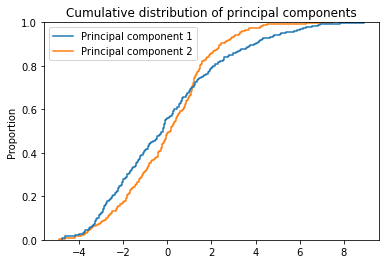

In [203]:
# Plotting empirical cumulative distribution function of principal components.

sns.ecdfplot(data=principalDf)
plt.title("Cumulative distribution of principal components", loc='center',fontsize = 12)

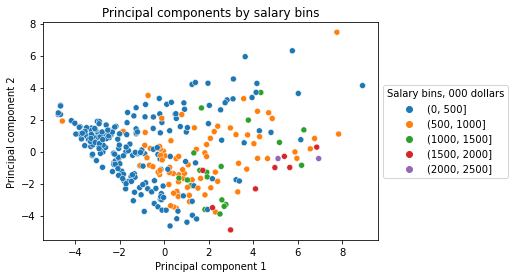

In [204]:
# Plotting principal compoenents
g=sns.scatterplot(data=finalDf, x="Principal component 1", y="Principal component 2", hue="sal_bins")
plt.title("Principal components by salary bins", loc='center',fontsize = 12)
g.legend(title='Salary bins, 000 dollars',loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

A PCA plot shows clusters of samples based on their similarity. PCA does not discard any samples or characteristics (variables). Instead, it reduces the overwhelming number of dimensions by constructing principal components (PCs).
As expected, salaries equal or smaller then 500 thousand dollars are more frequent and there are few salaries from 2000 to 2500 thousand dollars.

Text(0.5, 0.98, 'Principal components by salary bins with regression line')

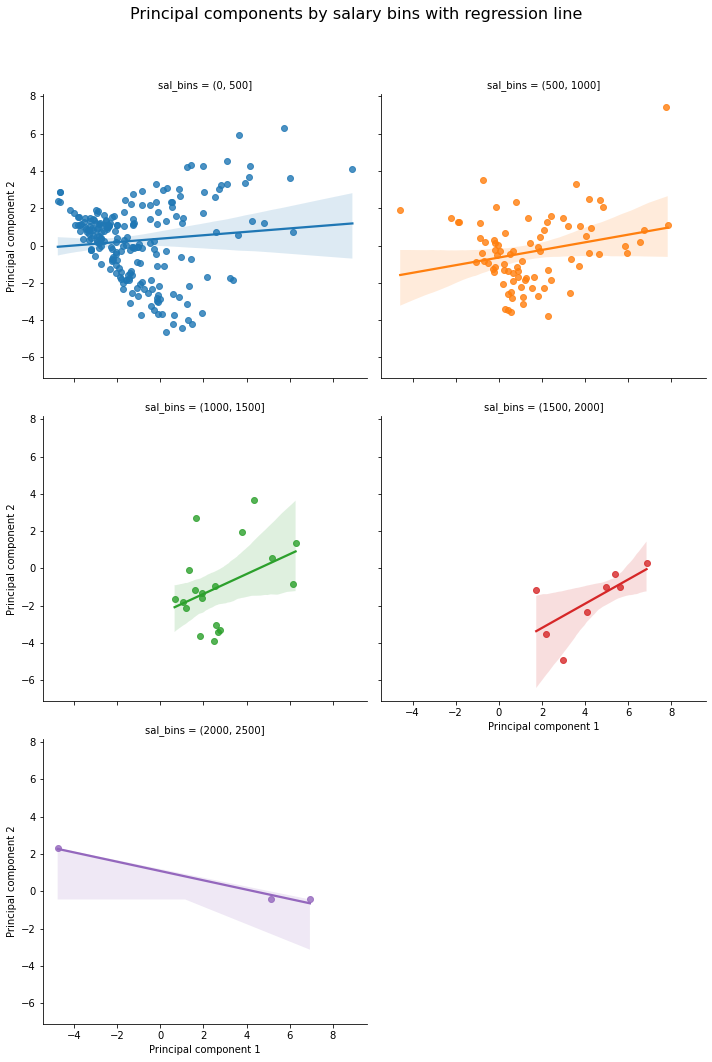

In [205]:
h=sns.lmplot(data=finalDf, x="Principal component 1", y="Principal component 2", col="sal_bins", hue="sal_bins", col_wrap=2)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Principal components by salary bins with regression line',fontsize=16)

Visualising a linear relationship as determined through regression helps us to understand data. As seen before, thought there is a correlation with the variables with salary, it is not strong, suggesting there are others variables that influence salary, as, for example, popularity.

## Another method to choose main variables

In [185]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=3)
# apply feature selection
target = 'Outcome'
X = df.loc[:, features]
y2=df['Salary']
X_selected = fs.fit_transform(x, y2)
print(X_selected.shape)

(322, 3)


We can reduce features to three, for example.

In [206]:
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression


model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,\
                                      k="all")
columns = ['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors',]
results = model.fit(df[columns], df['Salary'])

print (results.scores_)
print (results.pvalues_)

# Using just correlation coefficient:


for col in columns:
    lm = LinearRegression(fit_intercept=True)
    lm.fit(df[[col]], df['Salary'])
    print (lm.score(df[[col]], df['Salary']))

[5.18524307e+01 6.67072193e+01 3.95151439e+01 6.20065943e+01
 7.20712942e+01 7.03606763e+01 4.30452097e+01 8.87186391e+01
 1.01112197e+02 8.06842120e+01 1.08242224e+02 1.03595600e+02
 7.47512310e+01 2.52888838e+01 6.04569858e-01 6.46810795e-02]
[4.30093365e-12 7.36572813e-15 1.06521402e-09 5.36782174e-14
 7.88170446e-16 1.60172485e-15 2.15188236e-10 9.37734123e-19
 7.49892767e-21 2.33065252e-17 4.98253925e-22 2.90085199e-21
 2.61229011e-16 8.23717475e-07 4.37414161e-01 7.99408027e-01]
0.1394435706621805
0.17250057920823458
0.10991232096764436
0.16231812543266744
0.18382191007862148
0.18024529764951647
0.11856707810104927
0.21706531239409277
0.24010749999072767
0.20136608719776117
0.2527593442932837
0.24456250269848057
0.189362882618896
0.07323978561701117
0.001885718154268634
0.00020208752579142786


As sen before, the highest correlation is with CRBI (Number of runs batted in during his career, CRuns (Number of runs during his career) or CHits (Number of hits during his career)

## Exercise 3

Normalise data taking into account outliers.

In [207]:
df2=df[['CRBI','CRuns','CHits']]
df2

,CRBI,CRuns,CHits
0,29,30,66
1,414,321,835
2,266,224,457
3,838,828,1575
4,46,48,101
...,...,...,...
317,311,379,806
318,451,897,1511
319,93,217,433
320,420,470,857


For this exercise will take the features with more correlation with salary.

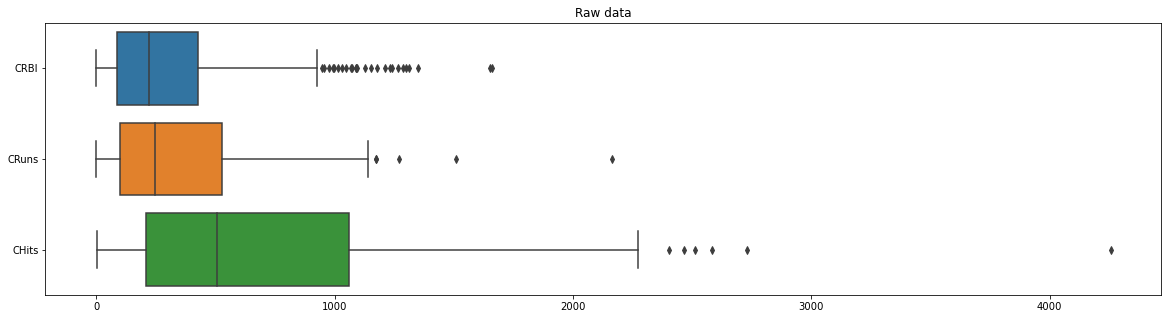

In [208]:
# Detecting outliers visualy.
plt.figure(figsize=(20,5))
sns.boxplot(data=df2, orient='h');
plt.title('Raw data');

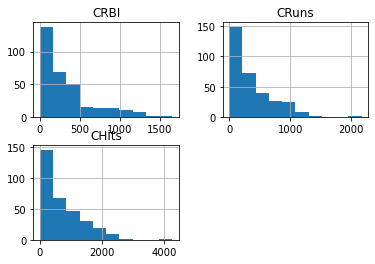

In [209]:
df2.hist()
pyplot.show()

The dataset provides a good candidate for using a robust scaler transform to standardize the data in the presence of skewed distributions and outliers.

In [212]:
# Using quantiles to detect outliers.

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRBI     337.50
CRuns    426.00
CHits    850.25
dtype: float64


In [211]:
print(df2 < (Q1 - 1.5 * IQR)) or (df2 > (Q3 + 1.5 * IQR))

      CRBI  CRuns  CHits
0    False  False  False
1    False  False  False
2    False  False  False
3    False  False  False
4    False  False  False
..     ...    ...    ...
317  False  False  False
318  False  False  False
319  False  False  False
320  False  False  False
321  False  False  False

[322 rows x 3 columns]


,CRBI,CRuns,CHits
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
317,False,False,False
318,False,False,False
319,False,False,False
320,False,False,False


In [192]:
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2_out.shape

(296, 3)

We have reduce the database from 322 to 296 rows. But, since outliers are not an error and are part of the distribution, we are missing information. So we discard droping rows and we will use instead RobustScaler and PowerTransforme, for example, to deal with outliers.

                0           1           2
count  322.000000  322.000000  322.000000
mean     0.324794    0.262430    0.246482
std      0.987317    0.784286    0.769741
min     -0.653333   -0.577465   -0.592767
25%     -0.390370   -0.344484   -0.351661
50%      0.000000    0.000000    0.000000
75%      0.609630    0.655516    0.648339
max      4.262222    4.502347    4.408115


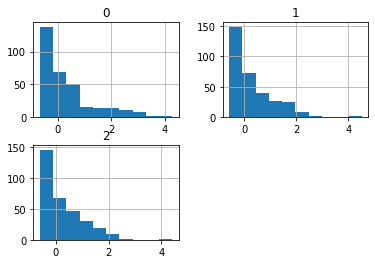

In [216]:
# Applying RobustScale

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler

# Perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(df2)
# convert the array back to a dataframe
df3 = DataFrame(data)
# summarize
print(df3.describe())
# histograms of the variables
df3.hist()
pyplot.show()

Scale features using statistics that are robust to outliers.This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

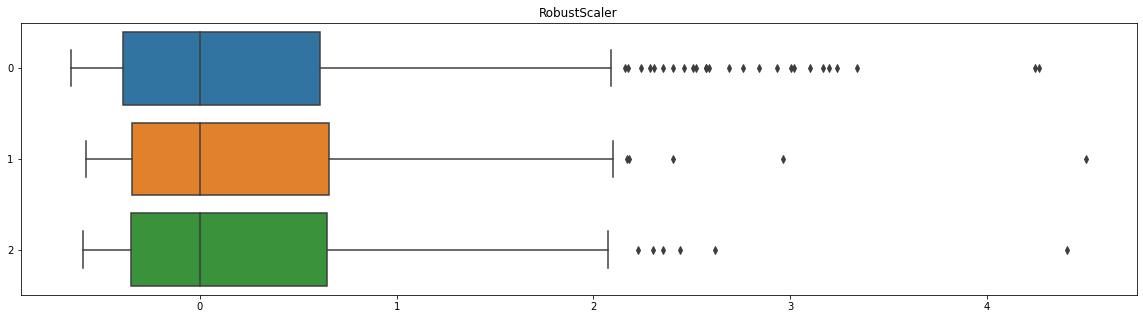

In [217]:
# Detecting outliers visualy after RobustScaler
plt.figure(figsize=(20,5))
sns.boxplot(data=df3, orient='h');
plt.title('RobustScaler');

[0.20988541 0.2524171  0.2614106 ]
               CRBI         CRuns     CHitsName
count  3.220000e+02  3.220000e+02  3.220000e+02
mean   2.437664e-16 -6.344132e-17  4.213331e-16
std    1.001556e+00  1.001556e+00  1.001556e+00
min   -2.819631e+00 -2.583933e+00 -2.518751e+00
25%   -6.988460e-01 -7.466277e-01 -7.367958e-01
50%    2.603096e-02 -5.053755e-03  7.345649e-03
75%    6.464649e-01  7.633530e-01  7.689663e-01
max    2.234058e+00  2.662979e+00  2.680901e+00


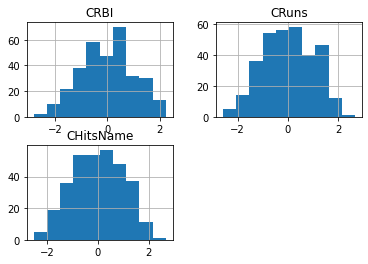

In [228]:
# Applying PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df2)
PowerTransformer()
print(pt.lambdas_)

df4= pt.transform(df2)
df5= DataFrame(df4)
df5.columns =['CRBI','CRuns','CHitsName']
print(df5.describe())
# histograms of the variables
df5.hist()
pyplot.show()



Apply a power transform featurewise to make data more Gaussian-like.Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

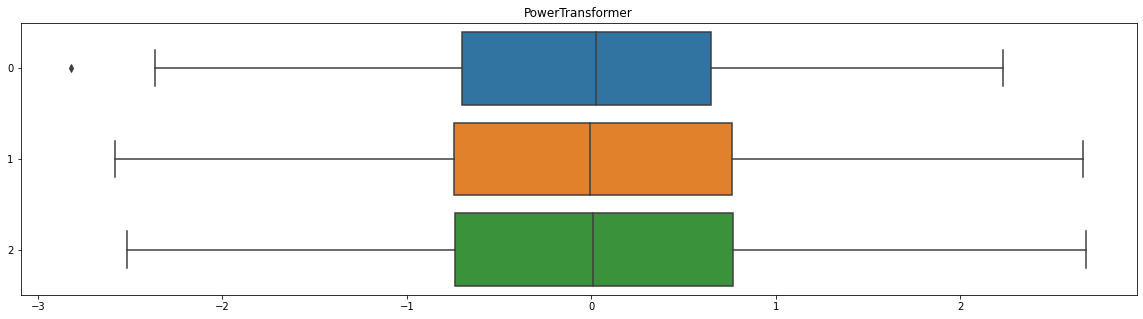

In [227]:
# Detecting outliers visualy after PowerTransformer
plt.figure(figsize=(20,5))
sns.boxplot(data=df5, orient='h');
plt.title('PowerTransformer');

## Conclusion

The rusults applying Robust Scaler are quite satifactory because the distribution is more symmetrical with less variability, thus more apt to machine learning techniques. But Power Transformation is the best technique of normalisation since has removed all the outliers, except one, and has transformed the distribution of the features more Gaussian-like, thus more apt to apply machine learning.